In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

from utils.conn_data import load_pickle

plt.style.use('ggplot')

In [32]:
model_name = "sdne-single-layer"
dataset_name = "cora"
outputs_path = os.path.join(os.getcwd(), "data", "outputs", dataset_name)
inputs_path = os.path.join(os.getcwd(), "data", "inputs", dataset_name)

args = load_pickle(os.path.join(outputs_path, model_name, "args.pickle"))["args"]

# graph info
graph_info = load_pickle(os.path.join(inputs_path, "graph_info.pickle"))

# train loss
train_loss = load_pickle(os.path.join(outputs_path, model_name, "epochs_train_loss.pickle"))["epochs_train_loss"]
train_loss_df = pd.DataFrame([val.item() for val in train_loss], columns=["train_loss"])

# embeddings
train_embeddings = load_pickle(os.path.join(outputs_path, model_name, "zs_train.pickle"))["zs_train"]
eval_embeddings = load_pickle(os.path.join(outputs_path, model_name, "zs_eval.pickle"))["zs_eval"]

In [33]:
graph_info.keys()

dict_keys(['G', 'Adj', 'Node', 'torch_graph_data'])

<Axes: >

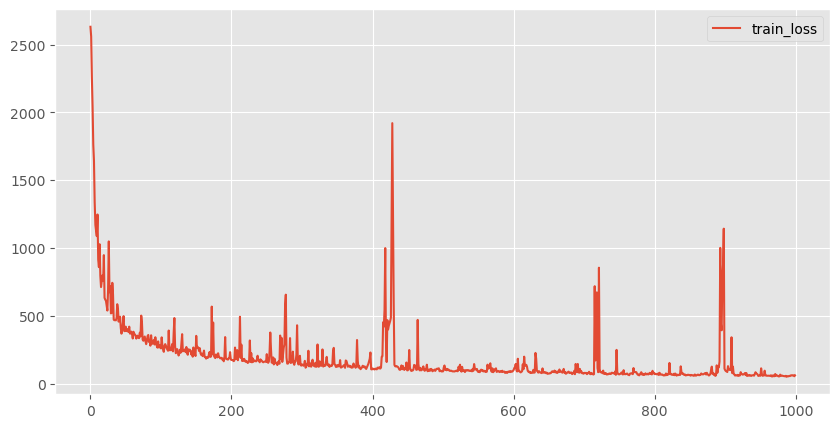

In [36]:
train_loss_df.plot(figsize=(10, 5))

In [37]:
eval_embeddings[0].shape

torch.Size([2708, 100])

In [43]:
tsne = TSNE(random_state = 0, n_iter = 1000, metric = 'cosine')
eval_embeddings2d = tsne.fit_transform(eval_embeddings[0])

eval_embeddings2d_df = pd.DataFrame()
eval_embeddings2d_df['Paper Topic'] = graph_info["torch_graph_data"].y
eval_embeddings2d_df['x'] = eval_embeddings2d[:,0]
eval_embeddings2d_df['y'] = eval_embeddings2d[:,1]

eval_embeddings2d_df.shape

(2708, 3)

In [45]:
eval_embeddings2d_df.tail()

,Paper Topic,x,y
2703,3,-0.370617,9.052904
2704,3,0.663872,6.386096
2705,3,-7.235595,3.631878
2706,3,-25.581743,-45.701717
2707,3,-26.035320,-45.725121


Text(0, 0.5, 'y')

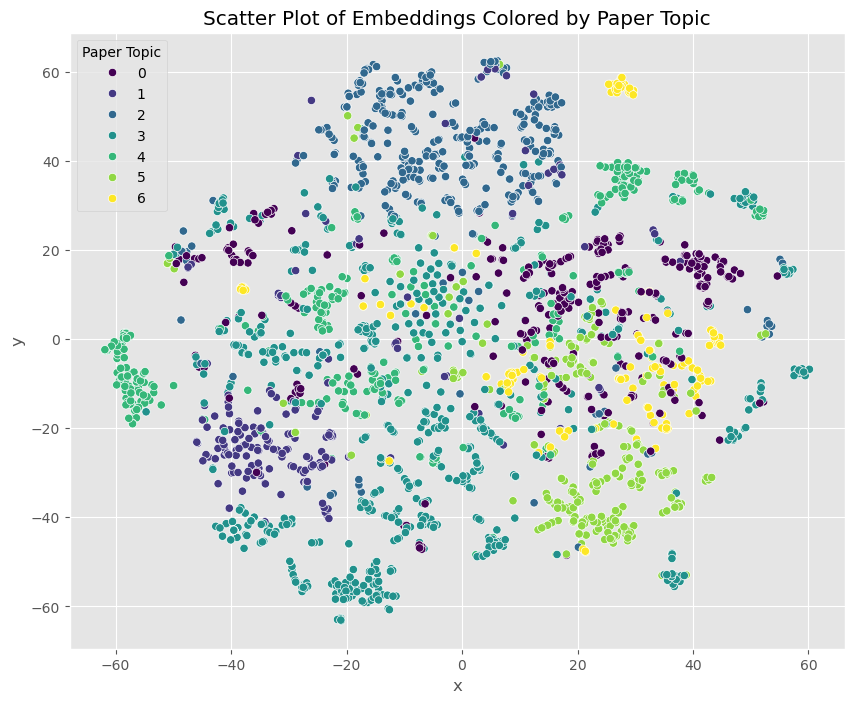

In [47]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=eval_embeddings2d_df, x='x', y='y', hue='Paper Topic', palette='viridis')

# Adding plot title and labels
plt.title("Scatter Plot of Embeddings Colored by Paper Topic")
plt.xlabel("x")
plt.ylabel("y")